<a href="https://colab.research.google.com/github/zahrapuspita10/Klasifikasi-Hate-Speech/blob/main/Copy_of_Pelabelan_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [ ]:
# Baca dataset hasil preprocessing
data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.head()

,full_text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...,dari yang aku tau pemerintah korea ada program...,"['dari', 'yang', 'aku', 'tau', 'pemerintah', '...","['tau', 'pemerintah', 'korea', 'program', 'ste...",tau perintah korea program sterilisasi anjing ...
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...,wah benar anjing jawir gombong ini ketemu di s...,"['wah', 'benar', 'anjing', 'jawir', 'gombong',...","['anjing', 'jawir', 'gombong', 'ketemu', 'stad...",anjing jawir gombong ketemu stadion gue gebuki...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...,kontol tidak ada yang jelas para pejabatpejaba...,"['kontol', 'tidak', 'ada', 'yang', 'jelas', 'p...","['kontol', 'pejabatpejabat', 'pemerintah', 'lo...",kontol pejabatpejabat perintah loh anjing biki...
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...,setelah bpjs memasukkan tuh duo koruptor jadi ...,"['setelah', 'bpjs', 'memasukkan', 'tuh', 'duo'...","['bpjs', 'memasukkan', 'tuh', 'duo', 'koruptor...",bpjs masuk tuh duo koruptor bpjs pbi gue muak ...
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...,tidak pemerintah tidak perusahaan sama saja an...,"['tidak', 'pemerintah', 'tidak', 'perusahaan',...","['pemerintah', 'perusahaan', 'anjing', 'ya', '...",perintah usaha anjing ya rakjel sengsara bilan...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12288 entries, 0 to 12287
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         12288 non-null  object
 1   cleaning          12288 non-null  object
 2   case_folding      12288 non-null  object
 3   normalisasi       12288 non-null  object
 4   tokenize          12288 non-null  object
 5   stopword removal  12288 non-null  object
 6   stemming          12280 non-null  object
dtypes: object(7)
memory usage: 672.1+ KB


# HAPUS BARIS NULL

In [ ]:
# Hapus baris yang mengandung nilai kosong
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12280 entries, 0 to 12287
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         12280 non-null  object
 1   cleaning          12280 non-null  object
 2   case_folding      12280 non-null  object
 3   normalisasi       12280 non-null  object
 4   tokenize          12280 non-null  object
 5   stopword removal  12280 non-null  object
 6   stemming          12280 non-null  object
dtypes: object(7)
memory usage: 767.5+ KB


# PROSES PELABELAN LEXICON

In [ ]:
# Buat DataFrame khusus kolom stemming
df_stem = pd.DataFrame(data['stemming'])
df_stem.head()

,stemming
0,tau perintah korea program sterilisasi anjing ...
1,anjing jawir gombong ketemu stadion gue gebuki...
2,kontol pejabatpejabat perintah loh anjing biki...
3,bpjs masuk tuh duo koruptor bpjs pbi gue muak ...
4,perintah usaha anjing ya rakjel sengsara bilan...


In [ ]:
# Lexicon hasil perluasan sesuai bentuk stemming
lexicon = {
    "hate_speech": [
        "anjing", "babi", "kontol", "memek", "tolol", "goblok", "bangsat",
        "sial", "brengsek", "keparat", "laknat", "kampret", "asu", "bego",
        "gila", "busuk", "bodoh", "edun", "setan", "iblis", "bajingan",
        "dungu", "bloon", "bangke", "parah", "brengsek", "jahat", "keji",
        "hina", "rendah", "malas", "bejat", "ngentot", "bahlul", "gembel",
        "korup", "koruptor", "bobrok", "busuk", "hancur", "tikus", "rampok",
        "palsu", "penipu", "curang", "jahat", "bangkrut", "licik", "jahil",
        "biadab", "dzalim", "zalim", "serakah", "pengkhianat", "nipu", "tipu",
        "bohong", "hoax", "kacau", "berantakan", "ancur", "nista", "terkutuk",
        "rezim", "presiden", "menteri", "pejabat", "dpr", "partai", "pemimpin", "penguasa", "sialan", "laknat"
    ],
    "provokasi": [
        "turun", "demo", "guling", "jatuh", "revolusi", "boikot", "hapus",
        "lengser", "bubar", "tolak", "runtuh", "serang", "usir", "protes",
        "lawansaja", "lawankorup", "reformasi", "mundur", "cabut", "tumbang",
        "serbu", "gulingkan", "rugi", "rusuh", "bakar", "perang", "marah",
        "provokasi", "fitnah", "adu", "kerusuhan", "tindas", "kuasai", "ancam",
        "jebak", "provokator", "boneka", "komunis", "fasis", "tirani",
        "bohong", "tipu", "manipulasi", "monopoli", "rebut", "palsu", "tumbangkan",
        "musnahkan", "hentikan", "singkirkan", "lengserkan", "hapuskan", "kerahkan",
        "kudeta", "lawan", "tembak", "bakar", "hancur", "isu", "bunuh"
    ],
    "non_hate_speech": [
        "baik", "bagus", "hebat", "mantap", "keren", "setuju", "dukung",
        "terima", "percaya", "apresiasi", "puji", "cinta", "suka", "berkah",
        "adil", "makmur", "damai", "aman", "sehat", "produktif", "optimis",
        "positif", "berhasil", "sukses", "bangga", "terbaik", "unggul", "disiplin",
        "semangat", "kerja", "teratur", "profesional", "lancar", "terkendali",
        "stabil", "maju", "berkembang", "berhasil", "solid", "kompak", "berani",
        "percaya", "puas", "lega", "syukur", "sejahtera", "terima", "baguslah",
        "alhamdulillah", "terpuji"
    ]
}

# Fungsi pelabelan berdasarkan lexicon
def label_by_lexicon(text):
    if not isinstance(text, str):
        return "Non-Hate Speech"

    words = text.split()
    hate = any(word in lexicon["hate_speech"] for word in words)
    provo = any(word in lexicon["provokasi"] for word in words)
    non_hate = any(word in lexicon["non_hate_speech"] for word in words)

    # Prioritas pelabelan: Hate Speech > Provokasi > Non-Hate
    if hate:
        return "Hate Speech"
    elif provo:
        return "Provokasi"
    elif non_hate:
        return "Non-Hate Speech"
    else:
        return "Non-Hate Speech"

# Terapkan pelabelan hanya pada kolom 'stemming'
df_stem["hasil_label_awal"] = df_stem["stemming"].apply(label_by_lexicon)

# Simpan hasil pelabelan ke file CSV
df_stem.to_csv("hasil_label_awal.csv", encoding='utf8', index=False)

## Pelabelan Final

In [ ]:
data = pd.read_csv('hasil_label_final.csv', delimiter=';')
data.head()

,stemming,hasil_label_awal
0,tau perintah korea program sterilisasi anjing ...,Non-Hate Speech
1,anjing jawir gombong ketemu stadion gue gebuki...,Hate Speech
2,kontol pejabatpejabat perintah loh anjing biki...,Hate Speech
3,bpjs masuk tuh duo koruptor bpjs pbi gue muak ...,Provokasi
4,perintah usaha anjing ya rakjel sengsara bilan...,Hate Speech


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12280 entries, 0 to 12279
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stemming          12280 non-null  object
 1   hasil_label_awal  12280 non-null  object
dtypes: object(2)
memory usage: 192.0+ KB


In [ ]:
label_counts = data['hasil_label_awal'].value_counts()
print(label_counts)

print("\n PROPORSI LABEL ")
print(round(label_counts / total * 100, 2))

hasil_label_awal
Hate Speech        5342
Non-Hate Speech    5216
Provokasi          1722
Name: count, dtype: int64

 PROPORSI LABEL 
hasil_label_awal
Hate Speech        43.50
Non-Hate Speech    42.48
Provokasi          14.02
Name: count, dtype: float64


/tmp/ipython-input-3816983876.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


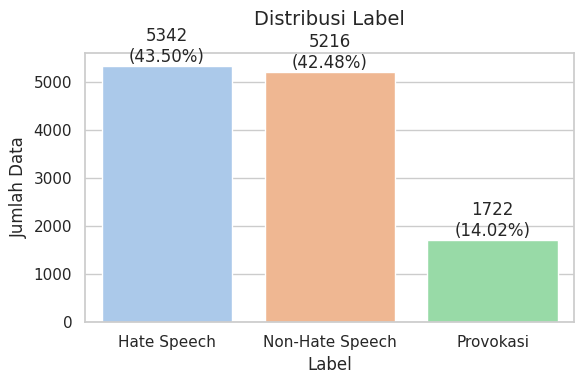


Rasio antara label terbanyak dan tersedikit: 3.10


In [ ]:
col = 'hasil_label_awal'

# Persentase distribusi label
label_counts = data[col].value_counts()
total = len(data[col])

# Visualisasi distribusi label
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette='pastel'
)

# Judul & label sumbu mengikuti contoh
plt.title('Distribusi Label', fontsize=14, pad=20)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)

# Anotasi jumlah & persentase di atas tiap batang
for i, count in enumerate(label_counts.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

ratio = label_counts.max() / label_counts.min()
print(f"\nRasio antara label terbanyak dan tersedikit: {ratio:.2f}")

In [ ]:
df_balanced.to_csv('data_balanced.csv', index=False)

## WordCloud

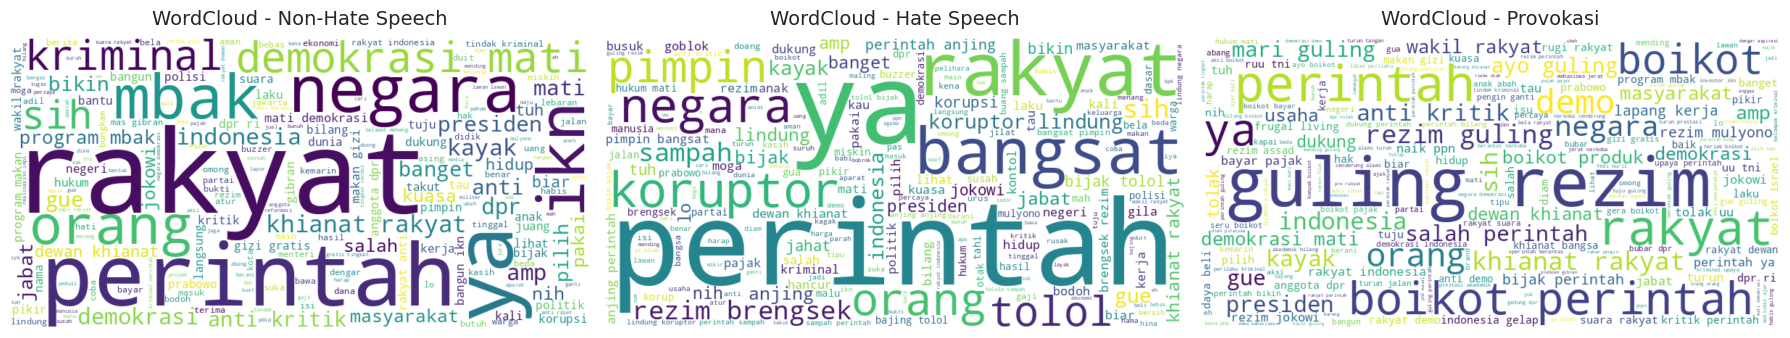

In [ ]:
from wordcloud import WordCloud

df = pd.read_csv('data_balanced.csv')

label_col_candidates = ['Label', 'label', 'hasil_label_awal']
text_col_candidates = ['text', 'Text', 'tweet', 'content', 'stemming']

label_col = next((c for c in label_col_candidates if c in df.columns), None)
text_col = next((c for c in text_col_candidates if c in df.columns), None)

if not label_col or not text_col:
    raise ValueError("Pastikan kolom label dan teks sesuai nama yang digunakan di dataset kamu.")

# --- 3. Buat WordCloud per kategori label ---
labels = df[label_col].unique()

plt.figure(figsize=(18, 5))
sns.set_style("whitegrid")

for i, label in enumerate(labels, 1):
    # Gabungkan semua teks dari label tertentu
    text_data = ' '.join(df[df[label_col] == label][text_col].astype(str))

    # Buat WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200
    ).generate(text_data)

    # Plot WordCloud
    plt.subplot(1, len(labels), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {label}', fontsize=14, pad=10)

plt.tight_layout()
plt.show()